In [1]:
# fearture selection 
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## in this dataset reprasents TV_Final.csv

In [2]:
dataframe=pd.read_csv(r'C:\Users\NAYUDU.B\OneDrive\Desktop\proj_data_science\ML\datasets\TV_Final.csv')

## head of the dataframe

In [3]:
dataframe.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


## shape of dataframe

In [4]:
dataframe.shape

(912, 7)

## checking null values in dataframe 
<h2> in this dataframe null values at 'Operating System' and 'Rating ' columns</h2>

In [5]:
dataframe.isna().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

<h3> fill tha null values at mean of that columns, and mode</h3>

In [6]:
dataframe['Rating'].fillna(dataframe['Rating'].mean(),inplace=True)
dataframe['Operating System'].fillna(dataframe['Operating System'].mode(),inplace=True)

<h3> using labelencoding and perform at preprocessing</h3>

In [7]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dataframe['Operating System']=lb.fit_transform(dataframe['Operating System'])
dataframe['Resolution']=lb.fit_transform(dataframe['Resolution'])

In [8]:
dataframe.head(5)

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,4,55,37999,54990,5,4.3
1,TCL,3,55,52999,129990,0,4.4
2,realme,1,32,13999,17999,0,4.3
3,Mi,1,32,14999,19999,0,4.4
4,realme,1,32,12999,21999,0,4.3


<h3> checking duplicate values and drop the duplicate values>/h3>

In [9]:
dataframe.duplicated().sum()

30

In [10]:
dataframe.drop_duplicates(inplace=True)

In [11]:
dataframe.shape

(882, 7)

In [12]:
dataframe.head(5)

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,4,55,37999,54990,5,4.3
1,TCL,3,55,52999,129990,0,4.4
2,realme,1,32,13999,17999,0,4.3
3,Mi,1,32,14999,19999,0,4.4
4,realme,1,32,12999,21999,0,4.3


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<h3> the below heatmap reprasents at 'dataframe.describe()' (min,max,25%,50%,75%,count,std)</h3>

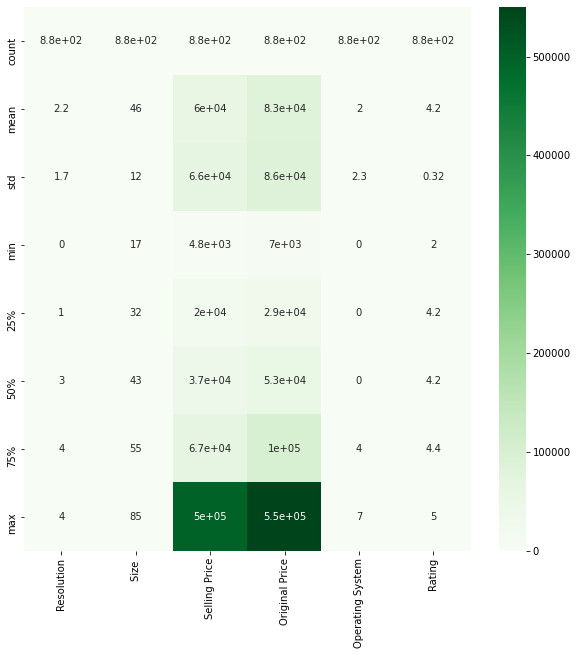

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(dataframe.describe(),annot=True,cmap='Greens')
plt.show()

<h3> the below heatmap reprasents the correlaton</h3>

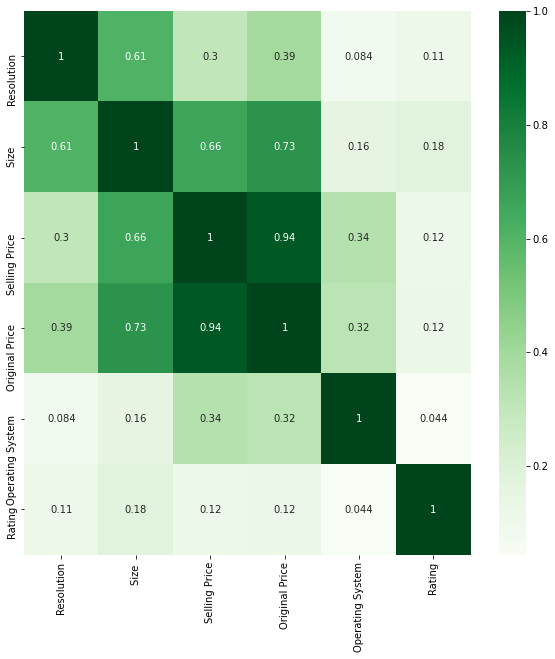

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(dataframe.corr(),annot=True,cmap='Greens')
plt.show()

<h3> perform the MinMaxscaler (Normalization )</h3>

In [16]:
col=dataframe[['Selling Price','Original Price']]

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()
dataframe[['Selling Price','Original Price']]=scaler.fit_transform(col)

<h3> final dataframe it will show below</h3>

In [19]:
dataframe

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,4,55,0.066951,0.088383,5,4.3
1,TCL,3,55,0.097245,0.226507,0,4.4
2,realme,1,32,0.018480,0.020258,0,4.3
3,Mi,1,32,0.020499,0.023941,0,4.4
4,realme,1,32,0.016460,0.027625,0,4.3
...,...,...,...,...,...,...,...
907,SONY,0,43,0.081088,0.093742,3,4.4
908,SONY,0,40,0.074019,0.082692,3,4.6
909,SONY,4,65,0.293131,0.327797,3,4.3
910,SONY,1,32,0.056653,0.047701,3,4.4


<h3>"X " its take to input features and "y " its takes the target values</h3>

In [20]:
x=dataframe.iloc[:,[1,2,4,5,6]].astype(int)
y=dataframe.iloc[:,3].astype(int)


<h3> the below plot show data at after MinMaxScaler</h3>

C:\Users\NAYUDU.B\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


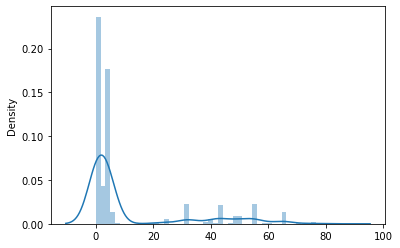

In [21]:
sns.distplot(x)
plt.show()

<h3>train and test the model using DecisionTreeClassifier algorithm</h3>

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [24]:
model_dc=RandomForestRegressor(n_estimators=100,max_depth=5,min_samples_leaf=0.2)

In [25]:
model_dc.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=0.2)

In [26]:
model_pred=model_dc.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score,classification_report,r2_score,mean_squared_error,mean_absolute_error

<h3> checking R2_score,MAE,MSE,accuracy score</h3>

In [28]:
r2_score(Y_test,model_pred)

1.0

In [35]:
print(f"mean_squared_error {mean_squared_error(Y_test,model_pred)}")
print(f"mean_absolute_error {mean_absolute_error(Y_test,model_pred)}")

mean_squared_error 0.0
mean_absolute_error 0.0


In [30]:
accuracy_score(Y_test,model_pred)

1.0

<h3> below at show the classification_report</h3>

In [31]:
print(classification_report(Y_test,model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



<h3> the below plot reprasent at difference of target data</h3>

C:\Users\NAYUDU.B\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NAYUDU.B\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


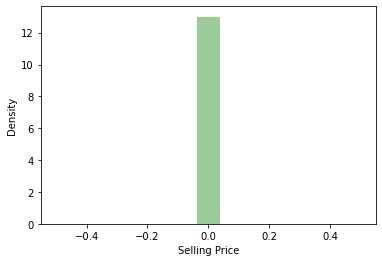

In [32]:
sns.distplot(Y_test-model_pred,color='g')
plt.show()

<h3> scatter plot at show the Y_test,model_pred</h3>

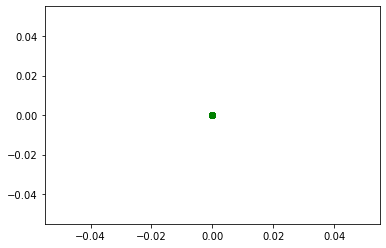

In [33]:
plt.scatter(Y_test,model_pred,color='g')
plt.show()

<AxesSubplot:>

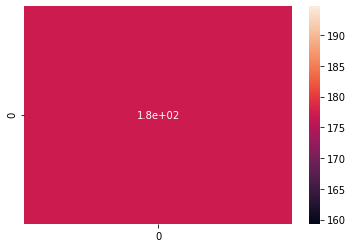

In [34]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,model_pred),annot=True)